In [1]:
from src.functions import *

In [2]:
plt.rcParams.update(
    {
        "xtick.direction": "in",
        "ytick.direction": "out",
        "ytick.right": False,
        "xtick.top": False,
        "ytick.left": True,
        "xtick.bottom": False,
        "figure.facecolor": "1",
        "savefig.facecolor": "1",
        "savefig.dpi": 600,
        "figure.dpi": 600,
        "savefig.bbox": "tight",
        "font.size": 7,
        "font.family": "serif",
        "lines.markersize": 6,
        "lines.linewidth": 1,
        'axes.axisbelow' : True
    }
)

In [3]:
methods = ['random', 'local']

In [4]:
qubit_sweeps = {}
delta = {}
delta_avg = {}
delta_std = {}
fit = {}
k = {}
k_err = {}

for method in methods:
    qubit_sweeps[method] = load_from_json(f'data/qubit_sweep_{method}.json')

    delta[method] = qubit_sweeps[method]['delta']
    delta_avg[method] = qubit_sweeps[method]['delta_avg']
    delta_std[method] = qubit_sweeps[method]['delta_std']
    fit[method] = qubit_sweeps[method]['fit']
    k[method] = qubit_sweeps[method]['k']
    k_err[method] = qubit_sweeps[method]['k_err']

T = qubit_sweeps['random']['T']
qubits_range = qubit_sweeps['random']['qubits_range']
num_random_models = qubit_sweeps['random']['num_random_models']

colors = {'random': grey,
          'local': blue,
          'quantum': red,
          'mismatches': 'orange'}

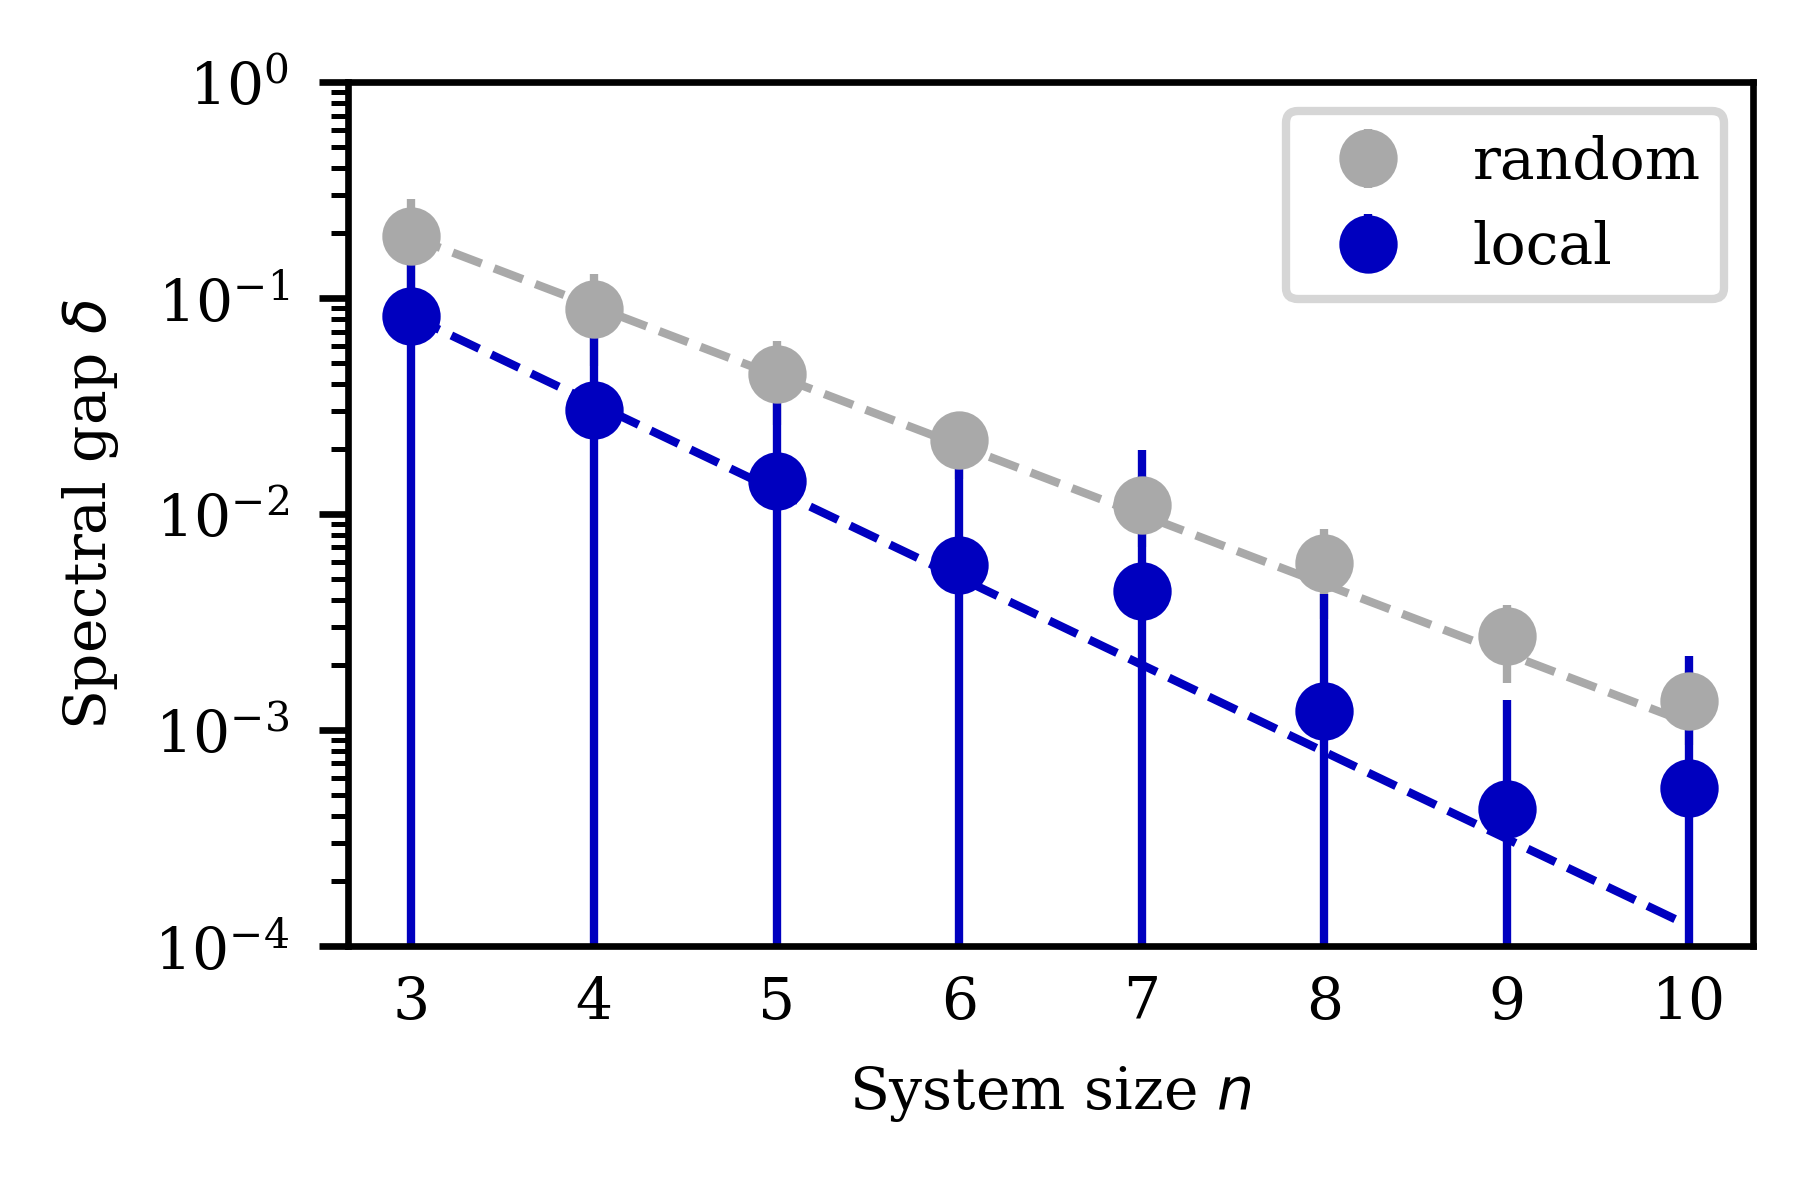

<Figure size 3840x2880 with 0 Axes>

In [5]:
fig = plt.figure(figsize=(figure_size_x/2, figure_size_y/2))

for method in methods:

    # Plot the data with error bars
    plt.errorbar(qubits_range, delta_avg[method], yerr=delta_std[method], fmt='o', color=colors[method], label=method)
    # Plot the fits
    plt.plot(qubits_range, fit[method], '--', color=colors[method])

plt.yscale('log')
plt.ylim([0.0001, 1])

# Customize the plot
plt.xlabel('System size $n$')
plt.ylabel('Spectral gap $\delta$')

plt.legend()
plt.show()
plt.tight_layout()
fig.savefig(local_path+f'figures/scale_factors_original')

In [6]:
for method in methods:
    print(f"k factor for {method}: {k[method]} ± {k_err[method]}")

k factor for random: 1.0693408388753753 ± 0.016026277169160406
k factor for local: 1.3403422498662219 ± 0.05193571452246154
